## Leraning Outcome
1. Load, display and save images.
2. Load, show and save videos.
3. Resize images

## Why OpenCV?
- compatible in multiple MAJOR OS, like Windows, Linux and MacOS, can be written in different languages: C++, Python and Java.
- Interoperable with Numpy modules, thereby faster computation of image array
- Large community support, a lot of resources (articles and stackoverflow posts).

## Image formats
- JPEG (.jpg, .jpeg, .jfif)
    - photos taken from camera
- PNG (.png)
    - website, larger file sizecompared to JPEG.
- tiff (.tif)
    - high quality printing, large file size.
- bmp (.bmp)
    - multiple uses, large file size
- GIF (.gid) (openCV cant deal with it)
    - animations, shallow color depth
- webp (.webp)
    - smaller file size compared to JPEG and PNG, IE11 not supported.

## Setup


In [1]:
import sys
#at least Python 3.7 is needed
assert sys.version_info >=(3,7)

import numpy as np
import cv2 as cv

In [2]:
# check OpenCV version
print(cv.__version__)

4.7.0


## Load and show images

In [3]:
img = cv.imread("images/lena.jfif")
#second argument: 1 (default), 0 (grayscale), -1(cv.IMREAD_UNCHANGED)
grayscale=cv.imread("images/lena.jfif",0)

cv.imshow("lena_color",img)
cv.imshow("lena_grayscale",grayscale)
cv.waitKey(0)    # key binding function: wait for user response
cv.destroyAllWindows()

In [4]:
def show_img(window_name,img):
    """2 arguments: window name and image"""
    cv.imshow(window_name,img)
    cv.waitKey(0)    # key binding function: wait for user response
    cv.destroyAllWindows()

In [5]:
#png
img = cv.imread("images/lena.png")

show_img("lena",img)

In [6]:
#difference between jpeg and png
img_jpeg= cv.imread("images/lena.jfif",-1)
img_png= cv.imread("images/lena.png",-1)

print(f"shape of jpeg image:{img_jpeg.shape}")
print(f"shape of png image:{img_png.shape}")

shape of jpeg image:(225, 225, 3)
shape of png image:(225, 225, 4)


In [7]:
!pip install imageio


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import imageio

In [9]:
# gif
GIF = imageio.mimread("images/rotating_earth_large.gif")
# change to BGR from RBG
imgs = [cv.cvtColor(img,cv.COLOR_RGB2BGR) for img in GIF]

for img in imgs:
    cv.imshow("GIF",img)
    cv.waitKey(200)
    
cv.destroyAllWindows()

## Save images
cv.imwrite(filepath,img)

In [10]:
# a more formalized approach
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("Not a valid Filepath")
    
cv.imshow("img",img)
k=cv.waitKey(0) & 0xFF   #
if k == 115:   #press 's' button
    cv.imwrite("lena_save.jpg",img)

cv.destroyAllWindows()

## Same operations on videos
Load and show videos

In [11]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
   
cv.namedWindow("frame",cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("no frame received!")
        break
        
    cv.imshow("frame",frame)
    k=cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
cv.destroyAllWindows()

In [12]:
## Webcam
cap = cv.VideoCapture(0)  # setting from webcam

if not cap.isOpened():
    sys.exit("No webcam found")
    
# save video object
# arguments: filepath, fourcc, fps, width and height
fourcc = cv.VideoWriter_fourcc("M","J","P","G")  #fourcc is an ID for algorithm to compress and decompress the video file
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w, h))

cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
   
cv.namedWindow("frame",cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    out.write(frame)
    cv.imshow("frame",frame)
    k=cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

In [13]:
import time

In [14]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
   
cv.namedWindow("frame",cv.WINDOW_NORMAL)
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("no frame received!")
        break
        
    cv.imshow("frame",frame)
    k=cv.waitKey(1) & 0xFF
    if k == 27:
        break
   
end = time.time()
#cap.release()
cv.destroyAllWindows()

In [15]:
print(f"The actual frame rate from the file: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The fps if stream using OpenCV: {n_frames / (end - start)}")

The actual frame rate from the file: 60.0
The fps if stream using OpenCV: 3789.228087578828


## Image resizing
1. set arbitary dimension (w, h).
2. scale factor

In [16]:
# 1 method
img = cv.imread("images/soccer.jpg")

new_height = 450
new_width = 300

#new_height = 300
#new_width = 450
# using this, the image will zou wei

#third argument: fx, 4th: fy, 5th: interpolation methods (default:bilinear)
img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original",img)
show_img("resize",img_resize)

In [17]:
img.shape

(1200, 800, 3)

In [18]:
# 2 method: scale factor

img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)
cv.imshow("original",img)
show_img("resize",img_resize)

## Exercise 1 
Load and display the image "dog.jfif. Save the image in png format.

In [19]:
img = cv.imread("images/dog.jfif")

cv.imshow("dog_color",img) 

k=cv.waitKey(0) & 0xFF   #
if k == 115: 
    cv.imwrite("dog_save.png",img)

cv.destroyAllWindows()

## Exercise 2
Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.


In [20]:
# method 1: cv.imshow() called twice
img = cv.imread("images/lena.jfif")
grayscale=cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("lena",img)
show_img("grayscale",grayscale)

In [21]:
# method 2: Import external module: matplotlib
import matplotlib.pyplot as plt

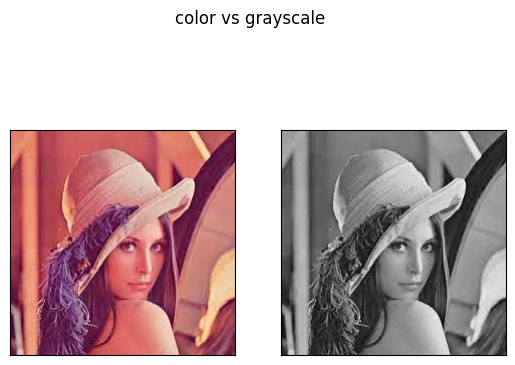

In [22]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.xticks([]),plt.yticks([])
plt.suptitle("color vs grayscale")
plt.show()

In [23]:
# method 3: concatenate (join array)
gray = cv.cvtColor(grayscale,cv.COLOR_GRAY2BGR)

#img_combined = np.hstack((img,gray))
img_combined = np.concatenate((img,gray),axis=1)

show_img("joined", img_combined)

## Exercise 3
Write codes that performs the following:
- Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
- Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [24]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
    
cv.namedWindow("frame",cv.WINDOW_NORMAL)    
    
fourcc = cv.VideoWriter_fourcc(*"mp4v")

fps = 20
w, h = int(cap.get(3))//2, int(cap.get(4))//2
out = cv.VideoWriter("smaller_img_pexels.mp4", fourcc, fps, (w, h))

   
while True:
    ret, frame = cap.read()
    
    frame = cv.resize(frame,(w,h))
    if not ret:
        print("No frame received!")
        break
        
    out.write(frame)
    cv.imshow("frame",frame)
    
    k=cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()


## Exercise 4
Enlarge the image "dog.jfif" by using different techniques: 1) Linear interpolation, 2) Cubic interpolation and 3) nearest neighbor interpolation. Comment on the upscaled of all the outputs.

In [27]:
#Linear interpolation
img = cv.imread("images/dog.jfif")
img_linear = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)

show_img("Linear interpolation", img_linear)


#Cubic interpolation
img = cv.imread("images/dog.jfif")
img_cubic = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_CUBIC)

show_img("Cubic Interpolation", img_cubic)


#nearest neighbor interpolation
img = cv.imread("images/dog.jfif")
img_nearest = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_NEAREST)

show_img("Nearest neighbor interpolation", img_nearest)

# Comments:
# Linear interpolation - clearest resolution
# Cubic interpolation - slightly worse resolution than linear interpolation.
# Nearest neigbor interpolation - lowest resolution